In [14]:
import networkx as nx

In [15]:
positive_edges = [
    ((1, 1), (2, 2)),
    ((2, 2), (3, 3)),
    ((4, 4), (3, 3)),
    ((1, 1), (4, 4)),
]

negative_edges = [
    ((-1, -1), (-2, -2)),
    ((-2, -2), (-3, -3)),
    ((-4, -4), (-3, -3)),
    ((-1, -1), (-4, -4)),
]

In [16]:
graph = nx.Graph()

In [17]:
graph.add_edges_from(positive_edges)
graph.add_edges_from(negative_edges)

In [18]:
graph.edges

EdgeView([((1, 1), (2, 2)), ((1, 1), (4, 4)), ((2, 2), (3, 3)), ((3, 3), (4, 4)), ((-1, -1), (-2, -2)), ((-1, -1), (-4, -4)), ((-2, -2), (-3, -3)), ((-3, -3), (-4, -4))])

In [19]:
graph.nodes

NodeView(((1, 1), (2, 2), (3, 3), (4, 4), (-1, -1), (-2, -2), (-3, -3), (-4, -4)))

In [20]:
list(nx.connected_components(graph))

[{(1, 1), (2, 2), (3, 3), (4, 4)}, {(-4, -4), (-3, -3), (-2, -2), (-1, -1)}]

In [21]:
graph_containing_edge = filter(lambda graph_component: graph_component.has_edge((1, 1), (2, 2)), nx.connected_components(graph))

In [22]:
graph_containing_edge

In [23]:
graph_containing_edge = list(graph_containing_edge)[0]

AttributeError: 'set' object has no attribute 'has_edge'

In [13]:
graph_containing_edge = list(filter(lambda graph_component: graph.subgraph(graph_component).has_edge((1, 1), (2, 2)), nx.connected_components(graph)))[0]

graph_containing_edge

{(1, 1), (2, 2), (3, 3), (4, 4)}

In [14]:
graph_containing_edge = graph.subgraph(graph_containing_edge).copy()
graph_containing_edge

In [16]:
graph_containing_edge.edges

EdgeView([((1, 1), (2, 2)), ((1, 1), (4, 4)), ((2, 2), (3, 3)), ((3, 3), (4, 4))])

In [17]:
nx.find_cycle(graph_containing_edge)

[((1, 1), (2, 2)), ((2, 2), (3, 3)), ((3, 3), (4, 4)), ((4, 4), (1, 1))]

In [18]:
list(nx.find_cycle(graph_containing_edge))

[((1, 1), (2, 2)), ((2, 2), (3, 3)), ((3, 3), (4, 4)), ((4, 4), (1, 1))]

In [13]:
len(nx.find_cycle(graph_containing_edge)) > 0

AttributeError: 'filter' object has no attribute 'is_directed'

In [11]:
from shapely.geometry import Polygon

In [12]:
polygon1 = Polygon(positive_edges)

TypeError: must be real number, not tuple

In [13]:
import shapely

pp1 = shapely.ops.polygonize(positive_edges)

AttributeError: module 'shapely' has no attribute 'ops'

In [14]:
from shapely.ops import polygonize

pp1 = polygonize(positive_edges)

In [15]:
pp1

<generator object CollectionOperator.polygonize at 0x7f506961b190>

In [ ]:
list(pp1)

In [17]:
from shapely.ops import polygonize_full

result, dangles, cuts, invalids = polygonize_full(positive_edges)

In [18]:
result

In [19]:
dangles

In [20]:
cuts

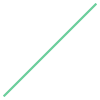

In [21]:
invalids

In [22]:
p_edges = [
    ((1, 1), (2, 2)),
    ((2, 2), (3, 3)),
    ((3, 3), (4, 4)),
    ((4, 4), (1, 1)),
]

In [23]:
polygon_of_p_edges = polygonize(p_edges)

In [24]:
polygon_of_p_edges

<generator object CollectionOperator.polygonize at 0x7f50691ba510>

In [25]:
list(polygon_of_p_edges)

[]

In [26]:
from shapely.geometry import MultiLineString
multilines = MultiLineString(p_edges)
print(multilines)

MULTILINESTRING ((1 1, 2 2), (2 2, 3 3), (3 3, 4 4), (4 4, 1 1))


In [27]:
from pprint import pprint
pprint(list(polygonize(multilines))) 

[]


In [28]:
result, dangles, cuts, invalids = polygonize_full(multilines)

In [29]:
result

In [30]:
dangles

In [31]:
cuts

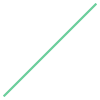

In [32]:
invalids

In [37]:
# [word for sentence in text for word in sentence]
point_set = {point for points in reversed(p_edges) for point in points}

In [27]:
point_set

NameError: name 'point_set' is not defined

In [41]:
p = Polygon(list(point_set))

In [43]:
list(p.exterior.coords)

[(4.0, 4.0), (1.0, 1.0), (3.0, 3.0), (2.0, 2.0), (4.0, 4.0)]

In [26]:
p_edges

NameError: name 'p_edges' is not defined

In [1]:
from Shapely_polygons.shapely_polygons import pointslist_from_lines, define_polygons, find_polygon_area

0.0
POLYGON ((1 1, 2 2, 3 3, 4 4, 1 1))


In [2]:
def get_area_of_polygon(polygon):
    polygon_input_points = pointslist_from_lines(polygon)
    polygon_object = define_polygons(polygon_input_points)
    area = find_polygon_area(polygon_object)
    return area


In [24]:
get_area_of_polygon(positive_edges)

0.0

In [28]:
p_edges = [
    ((0, 0), (1, 0)),
    ((1, 0), (1, 1)),
    ((1, 1), (0, 1)),
    ((0, 1), (0, 0)),
]

get_area_of_polygon(p_edges)

1.0

In [29]:
positive_edges

[((1, 1), (2, 2)), ((2, 2), (3, 3)), ((4, 4), (3, 3)), ((1, 1), (4, 4))]